In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# files are datasets/star-cluster-simulations/c_0000.csv - c_1800.csv, increments of 100
# stars from 0 through 6399

filenames = {}

orderedid = {}

# generate list from 00 to 18 ? 
listnum = ['00', '01','02','03','04','05',
           '06','07','08','09','10','11','12',
           '13','14','15','16','17','18']

for i in listnum:
    # just taking the data
    filenames[i] = pd.read_csv('datasets/star-cluster-simulations/c_{}00.csv'.format(i))
    # ordering it by the id 
    orderedid[i] =  filenames[i].reindex(index=filenames[i]['id'])
    del orderedid[i]['id']

orderedid['00'].iloc[:3,:]

,x,y,z,vx,vy,vz,m
id,,,,,,,
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


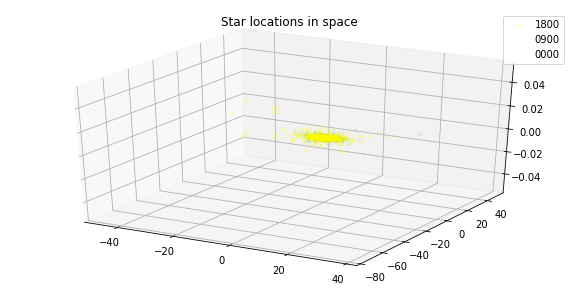

In [3]:
# all of the stars locations at 00:00

# get the x
all_x = filenames['00'].loc[:,'x']

# get the y
all_y = filenames['00'].loc[:,'y']

# get the z
all_z = filenames['00'].loc[:,'z']


allstarsloc = pd.DataFrame(index=range(len(filenames['00'])))
allstarsloc['x'] = all_x
allstarsloc['y'] = all_y
allstarsloc['z'] = all_z

plt.figure(figsize=(10,5)).gca(projection='3d')
plt.scatter(filenames['18'].loc[:,'x'], filenames['18'].loc[:,'y'], filenames['18'].loc[:,'z'],
           color='yellow', alpha=.17,label='1800')
plt.scatter(filenames['09'].loc[:,'x'], filenames['09'].loc[:,'y'], filenames['09'].loc[:,'z'],
               color='green',alpha=.05, label='0900'
           )
plt.scatter(allstarsloc['x'], allstarsloc['y'], allstarsloc['z'],
    color='purple', alpha=.20, label='0000'
)

plt.title('Star locations in space')
plt.legend()
plt.show()

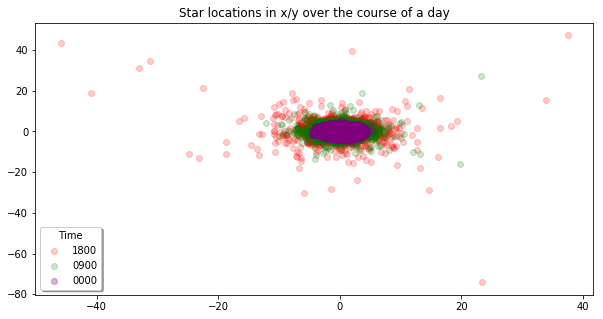

In [4]:
# all stars locations over the course of the day in x, y

plt.figure(figsize=(10,5))
plt.scatter(x=filenames['18'].loc[:,'x'], y=filenames['18'].loc[:,'y'], 
           color='red', alpha=.20,label='1800'
           )
plt.scatter(x=filenames['09'].loc[:,'x'], y=filenames['09'].loc[:,'y'],
               color='green',alpha=.20, label='0900'
           )
plt.scatter(x=allstarsloc['x'], y=allstarsloc['y'],
    color='purple', alpha=.30, label='0000'
           )

plt.title('Star locations in x/y over the course of a day')
plt.legend(shadow=True, title='Time')
plt.show()

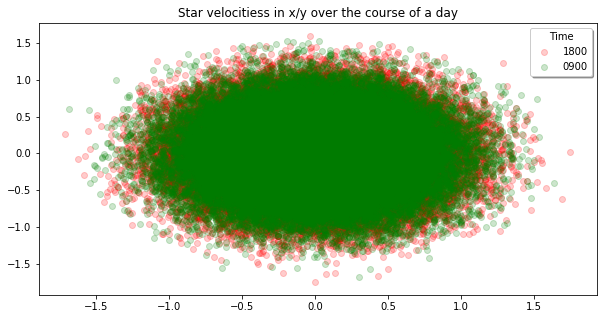

In [7]:
# all stars velocities over the course of the day in x, y

plt.figure(figsize=(10,5))
plt.scatter(x=orderedid['18'].loc[:,'vx'], y=orderedid['18'].loc[:,'vy'], 
           color='red', alpha=.20,label='1800'
           )
plt.scatter(x=orderedid['09'].loc[:,'vx'], y=orderedid['09'].loc[:,'vy'],
               color='green',alpha=.20, label='0900'
           )
#plt.scatter(x=orderedid['00'].loc[:,'vx'], y=allstarsloc['00'].loc[:,'vy'] ,
 #   color='purple', alpha=.30, label='0000'
 #          )

plt.title('Star velocities in x/y over the course of a day')
plt.legend(shadow=True, title='Time')
plt.show()

In [31]:
# mean of x, y, z, to get the cluster "center" at each time

mean_x = []
mean_y = []
mean_z = []

for num in listnum:
    mean_x.append(np.mean(filenames[num].loc[:,'x']))
    mean_y.append(np.mean(filenames[num].loc[:,'y']))
    mean_z.append(np.mean(filenames[num].loc[:,'z']))

# filenames['00'].mode()

#from scipy import stats
#stats.mode(filenames['00'], axis=None)

centroid = pd.DataFrame(index=listnum)
centroid['x'] = mean_x
centroid['y'] = mean_y
centroid['z'] = mean_z

centroid

,x,y,z
00,-1.176595e-10,3.412734e-10,2.464757e-10
01,2.750745e-05,9.237395e-04,-3.431984e-04
02,-1.445949e-03,3.365790e-03,-5.762731e-04
03,-6.491956e-03,7.228926e-03,-1.250761e-03
04,-1.268588e-02,1.339715e-02,-1.657701e-03
05,-1.994709e-02,1.853387e-02,-1.174266e-03
06,-2.815595e-02,2.453804e-02,-1.029976e-03
07,-3.775023e-02,3.304917e-02,6.543372e-04
08,-4.520098e-02,4.246163e-02,1.570002e-03
09,-4.979455e-02,5.113649e-02,1.574555e-03


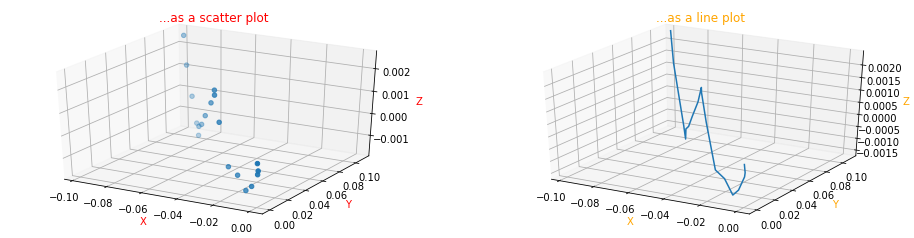

In [32]:
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
#import numpy as np

fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(mean_x, mean_y, mean_z)
ax.set_xlabel('X', color='red')
ax.set_ylabel('Y', color='red')
ax.set_zlabel('Z', color='red')
plt.title('...as a scatter plot', color='red')

ax = fig.add_subplot(122, projection='3d')
ax.plot(mean_x,mean_y,mean_z)
ax.set_xlabel('X', color='orange')
ax.set_ylabel('Y', color='orange')
ax.set_zlabel('Z', color='orange')
plt.title('...as a line plot', color='orange')

    
plt.show()

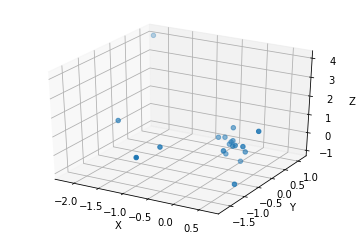

In [33]:
# show how 1 star is moving
# lets say 6399

star = 6399

one_x = []
one_y = []
one_z = []

for i in listnum:
    one_x.append(orderedid[i].at[star,'x'])
    one_y.append(orderedid[i].at[star,'y'])
    one_z.append(orderedid[i].at[star,'z'])   
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(one_x, one_y, one_z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
    
plt.show()

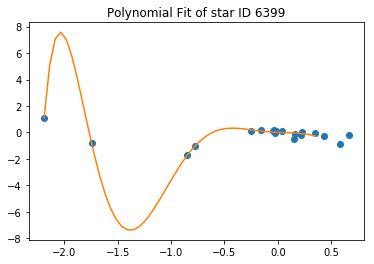

In [34]:
# fit a polynomial based on one star (the same one)

z = np.polyfit(one_x,one_y,7)
f = np.poly1d(z)

x_new = np.linspace(one_x[0], one_x[-1], 50)
y_new = f(x_new)

plt.plot(one_x,one_y,'o', x_new, y_new)
plt.title('Polynomial Fit of star ID {}'.format(star))
ax = plt.gca()
#ax.set_facecolor('gray')
fig = plt.gcf()
#py.plot_mpl(fig, filename='polynomial-Fit-with-matplotlib')


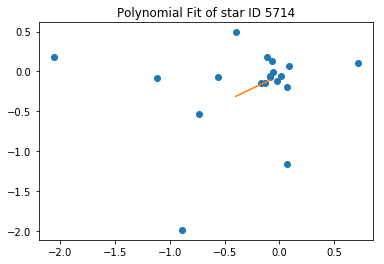

In [55]:
# given that polynomial, guess a neighboring stars projected location

star2 = star-1

two_x = []
two_y = []
two_z = []

for i in listnum:
    two_x.append(orderedid[i].at[star2,'x'])
    two_y.append(orderedid[i].at[star2,'y'])
    two_z.append(orderedid[i].at[star2,'z']) 
    
# just through :12 in order to estimate the rest based off the polynomial
z2 = np.polyfit(two_x,two_y,3)
f2 = np.poly1d(z2)

x2_new = np.linspace(two_x[0], two_x[-1], 50)
y2_new = f2(x2_new)

plt.plot(two_x,two_y,'o', x2_new, y2_new)
#plt.plot(two_x, two_y, 'o', x2_new)
plt.title('Polynomial Fit of star ID {}'.format(star2))
ax = plt.gca()
fig = plt.gcf()

In [ ]:
# same thing but with like 3 or 4 stars at once, like use some data points from 3 or 4 
# differnt stars
# in 1 list and fit that to a polynomial ( the assumption is that stars near each other 
# act similarly)
# and see if it works
# also can compare against stars that are more ... further awawy
#
# ie, based on last 5 velocity values, predict the 6th  - start with 1 star
# --- you can try first 3, then 4, to see which is the best way / best #
# matrix solution kind of problem
# compare the values to the previous point before it  
# then you do the polynomial fit

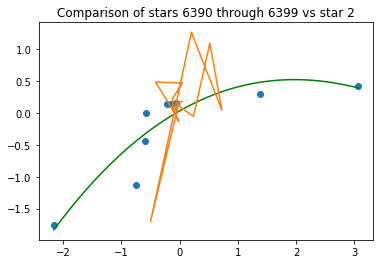

In [82]:
multistars = []

# i'm going to use data from stars 6390 - 6399 
# and compare with a star - maybe 2

compare = 2

x_of2 = []
y_of2 = []

multi_x = []
multi_y = []

x = 0
    
for i in listnum:
    x_of2.append(orderedid[i].at[compare,'x'])
    y_of2.append(orderedid[i].at[compare,'y'])
    while x < 9:
        star = star-x
        multi_x.append(orderedid[i].at[star,'x'])
        multi_y.append(orderedid[i].at[star,'y'])
        x +=1
        
multi_x = sorted(multi_x)
multi_y = sorted(multi_y)

z3 = np.polyfit(multi_x,multi_y,3)
f3 = np.poly1d(z3)

x_new2 = np.linspace(multi_x[0], multi_x[-1], 50)
y_new2 = f3(x_new2)

plt.plot(multi_x,multi_y,'o', x_new2, y_new2, 'g', x_of2, y_of2)
#plt.plot(multi_x,multi_y, 'o',f3)
plt.title('Comparison of stars 6390 through 6399 vs star 2'.format(star))
ax = plt.gca()
fig = plt.gcf()



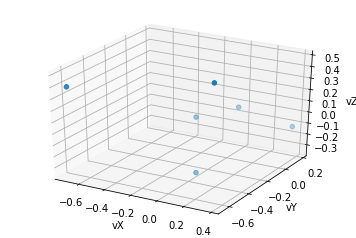

      5        4        3         2
5995 x + 1928 x - 1764 x - 24.13 x + 41.51 x - 1.195


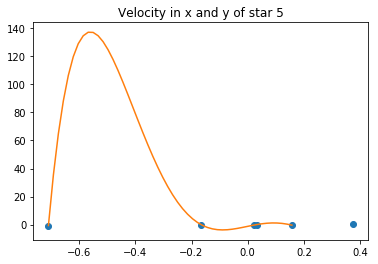

In [106]:
# ie, based on last 5 velocity values, predict the 6th  - start with 1 star
# --- you can try first 3, then 4, to see which is the best way / best #
# matrix solution kind of problem
# compare the values to the previous point before it  
# then you do the polynomial fit

vxes = []
vys = []
vzs = []

for i in listnum:
    vxes.append(orderedid[i].at[5,'vx'])
    vys.append(orderedid[i].at[5,'vy'])
    vzs.append(orderedid[i].at[5,'vz'])
    if i == '05':
        break
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vxes, vys, vzs)
ax.set_xlabel('vX')
ax.set_ylabel('vY')
ax.set_zlabel('vZ')
    
plt.show()

try1 = np.polyfit(vxes,vys,5)

newf = np.poly1d(try1)
print (newf)

# calculate new x's and y's
vx_new = np.linspace(vxes[0], vxes[-1], 50)
vy_new = newf(vx_new)


plt.plot(vxes,vys,'o', vx_new, vy_new)
plt.title('Velocity in x and y of star 5')
ax = plt.gca()
fig = plt.gcf()

In [40]:
# if we separate the cluster into two groups, one group of stars that stay within the cluster,
# and the other a group that exits the cluster... this is the group that exits the cluster

greater = filenames['18'][filenames['18']['x'] >= 15] 
lesser = filenames['18'][filenames['18']['x'] <= -15]

outer = pd.concat([greater,lesser])

outer

# make a list of the IDs so i can use that info later
outer_ids = outer['id'].tolist()
#inner = filenames['18'][filenames['18']['x'] > -15 & [filenames['18']['x'] < 15]]

#half = filenames['18'][filenames['18']['x'] < 15]
#half2 = filenames['18'][filenames['18']['x'] > -15] 

# and this is the group that stays closer... a much larger group
inner = filenames['18'].query('(x < 15) & (x > -15)')

# also getting a list of just their ids
inner_ids = inner['id'].tolist()

In [52]:
print(sorted(outer_ids))

[1074, 16725, 19567, 20867, 29428, 31185, 33000, 41594, 42898, 43796, 47030, 51894, 53120, 53726, 55798, 56098, 58479, 58712, 62098]


In [55]:
# just double checking that I did it correctly and each ID is only listed in 1 list
for value in inner_ids:
    if value in outer_ids:
        print('{} is in both'.format(value))

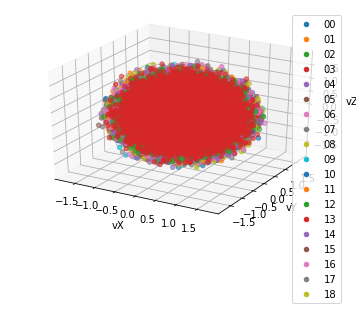

In [102]:
# getting velocities over time of inner cluster only

inner_vxes = {}
inner_vys = {}
inner_vzs = {}

# by time...
for i in listnum:
    temp_x = []
    temp_y = []
    temp_z = []
    # by star id
    for star_id in inner_ids:
            temp_x.append(orderedid[i].at[star_id,'vx'])
            inner_vxes[i] = temp_x
                
            temp_y.append(orderedid[i].at[star_id,'vy'])
            inner_vys[i] = temp_y
            
            temp_z.append(orderedid[i].at[star_id,'vz'])
            inner_vzs[i] = temp_z
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in listnum:
    ax.scatter(inner_vxes[i], inner_vys[i], inner_vzs[i],label=i)
ax.set_xlabel('vX')
ax.set_ylabel('vY')
ax.set_zlabel('vZ')
plt.legend()

plt.show()

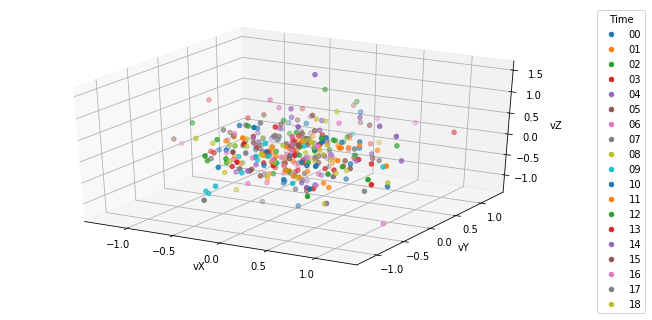

In [99]:
# getting velocities over time of outer cluster only

outer_vxes = {}
outer_vys = {}
outer_vzs = {}

# by time...
for i in listnum:
    temp_x = []
    temp_y = []
    temp_z = []
    # by star id
    for star_id in outer_ids:
            temp_x.append(orderedid[i].at[star_id,'vx'])
            outer_vxes[i] = temp_x
                
            temp_y.append(orderedid[i].at[star_id,'vy'])
            outer_vys[i] = temp_y
            
            temp_z.append(orderedid[i].at[star_id,'vz'])
            outer_vzs[i] = temp_z

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

for i in listnum:
    ax.scatter(outer_vxes[i], outer_vys[i], outer_vzs[i],label=i)

ax.set_xlabel('vX')
ax.set_ylabel('vY')
ax.set_zlabel('vZ')
ax.legend(title='Time',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

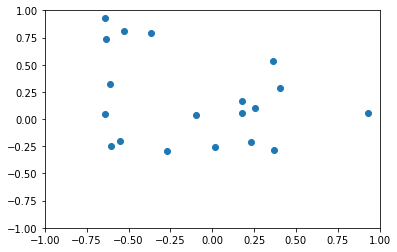

In [93]:
# trying to animate it over time...

fig, ax = plt.subplots()
x, y = outer_vxes,outer_vys
sc = ax.scatter(x,y)
plt.xlim(-1,1)
plt.ylim(-1,1)


def animate(i):
#    x.append(np.random.rand(1)*10)
#    y.append(np.random.rand(1)*10)
#    sc.set_offsets(np.c_[x,y])
    x = len(outer_ids)
    y = 0
    for i in listnum:
        sc.set_offsets(np.c_[(outer_vxes[y:y+x], outer_vys[y:y+x])])
    y+=x

ani = FuncAnimation(fig, animate, 
                frames=2, interval=100, repeat=True) 
plt.show()

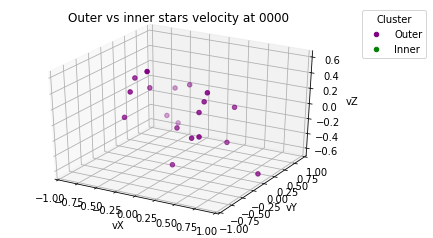

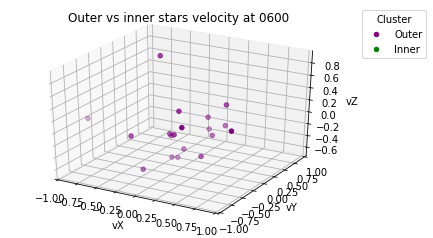

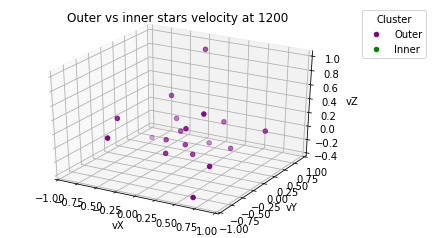

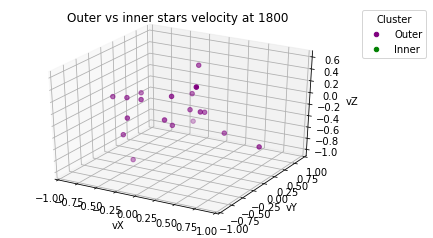

In [135]:
# compare velocities of each group for 4 different hours - 00, 06, 12, 18

for i in range(0,19,6):
    meh = listnum[i]
    filenames[listnum[i]]
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    ax.scatter(outer_vxes[meh], outer_vys[meh], outer_vzs[meh],label='Outer', color='purple')
    
    try_x = sorted(inner_vxes[meh])
    try_y = sorted(inner_vys[meh])
    try_z = sorted(inner_vzs[meh])
    
    vx_i_new = np.linspace(try_x[0], try_x[-1], 19)
    vy_i_new = np.linspace(try_y[0], try_y[-1], 19)
    vz_i_new = np.linspace(try_z[0], try_z[-1], 19)
    
    ax.scatter(vx_i_new, vy_i_new, vz_i_new,label='Inner', color='green')

    ax.set_xlabel('vX')
    ax.set_ylabel('vY')
    ax.set_zlabel('vZ')
    plt.title('Outer vs inner stars velocity at {}00'.format(meh))
    ax.legend(title='Cluster',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
